## Project

### Stock Analysis

**pip install pandas_datareader**
Pandas DataReader library provides functions that extract data drom various internet sources into a Pandas DataFrame.

In [1]:
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf
yf.pdr_override()
start_date = dt.datetime(2004,1,1)
end_date = dt.datetime(2019,9,15)
amd = pdr.get_data_yahoo('AMD', start = start_date, end = end_date)
# amd.head(3)
qcom = pdr.get_data_yahoo('QCOM', start = start_date, end = end_date)
intc = pdr.get_data_yahoo('INTC', start = start_date, end = end_date)
ibm = pdr.get_data_yahoo('IBM', start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
ibm.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-09,134.407272,136.730408,134.282990,136.328873,111.891197,4421024
2019-09-10,136.711288,139.063095,136.673035,138.671127,113.813591,5208766
2019-09-11,138.479919,138.738052,136.434036,137.284897,112.675850,4047706
2019-09-12,137.695984,137.705551,135.640533,137.304016,112.691544,2620648
2019-09-13,137.973236,138.288712,136.959854,137.351822,112.730759,2308104


### Time Series Data

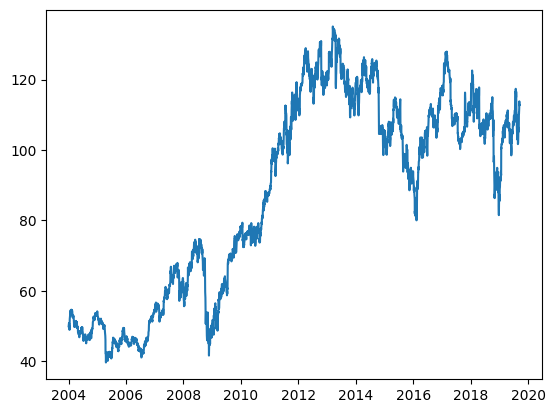

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib inline is used to render any matplotlib diagrams
# even if the plt.show() is not used
import matplotlib.dates as mdates
plt.plot(ibm.index, ibm['Adj Close'])
plt.show()

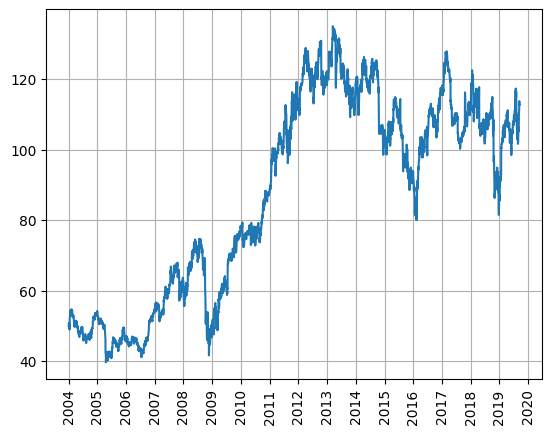

In [4]:
# add more ploting options
plt.plot(ibm.index, ibm['Adj Close'])
# customize ticks and labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'IBM')

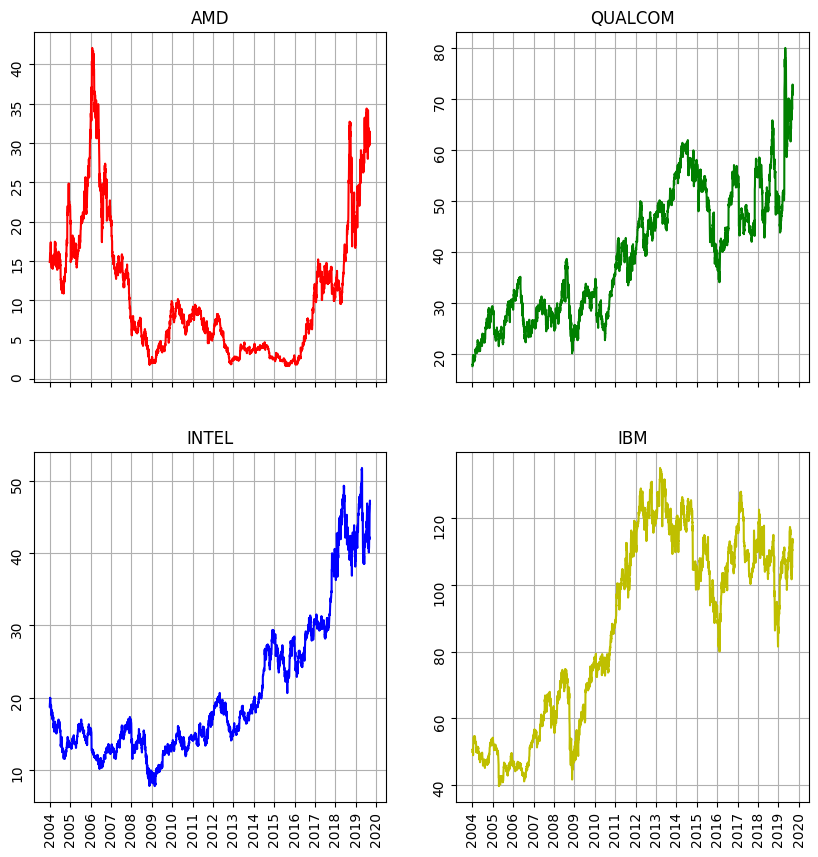

In [5]:
# Subplot
f, ax = plt.subplots(2,2,figsize = (10,10), sharex = True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
ax[0,0].plot(amd.index,amd['Adj Close'], color = 'r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation = 90)
ax[0,0].set_title('AMD')

ax[0,1].plot(qcom.index,qcom['Adj Close'], color = 'g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation = 90)
ax[0,1].set_title('QUALCOM')

ax[1,0].plot(intc.index,intc['Adj Close'], color = 'b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation = 90)
ax[1,0].set_title('INTEL')

ax[1,1].plot(ibm.index,ibm['Adj Close'], color = 'y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation = 90)
ax[1,1].set_title('IBM')

### Prediction Stock (INTEL) Price using Machine Learning

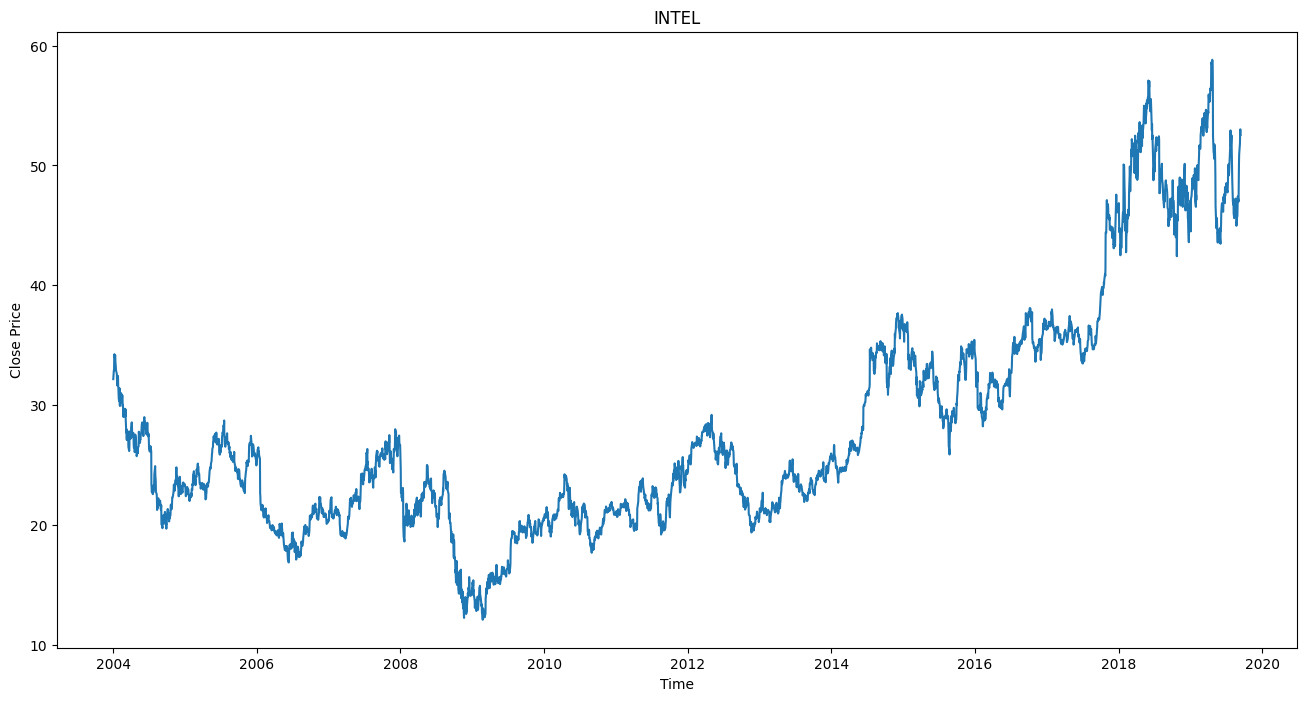

In [6]:
# Plot the Close price for prediction
plt.figure(figsize = (16,8))
plt.title('INTEL')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.plot(intc['Close'])

In [7]:
# get only the close price
intc = intc[['Close']]
intc.head(5)

,Close
Date,
2004-01-02,32.160000
2004-01-05,32.910000
2004-01-06,32.900002
2004-01-07,33.990002
2004-01-08,34.240002


In [8]:
# create a variable to predict 'x' unit (time) out into the future
# future = 5 # example to show what happened
future = 25 # 25 days
# create a new column (target) shifted 'x' units(time) up
intc['Prediction'] = intc[['Close']].shift(-future)
intc.head(8)

,Close,Prediction
Date,,
2004-01-02,32.160000,30.570000
2004-01-05,32.910000,30.540001
2004-01-06,32.900002,30.990000
2004-01-07,33.990002,30.740000
2004-01-08,34.240002,30.139999
2004-01-09,33.970001,30.809999
2004-01-12,34.150002,30.600000
2004-01-13,33.590000,29.889999


In [9]:
intc.tail(8)

,Close,Prediction
Date,,
2019-09-04,48.919998,NaN
2019-09-05,50.099998,NaN
2019-09-06,50.919998,NaN
2019-09-09,51.590000,NaN
2019-09-10,51.820000,NaN
2019-09-11,52.790001,NaN
2019-09-12,53.009998,NaN
2019-09-13,52.540001,NaN


In [10]:
# create a future dataset (X) and convert it to a numpy array and
# remove the last 'x' rows/time
# Two machine learning models are considered here
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# drop axis 1 (column)
# X = (intc.drop(['Prediction'],axis=1))[:-future]
X = np.array(intc.drop(['Prediction'],axis=1))[:-future]
# print(X.tail(8))
print(X)

[[32.15999985]
 [32.90999985]
 [32.90000153]
 ...
 [46.95999908]
 [46.72999954]
 [47.16999817]]


In [11]:
# create the target dataset Y and convert it numpy
# get all of the taget values except the last 'x' rows/time
y = np.array(intc['Prediction'])[:-future]
y

array([30.56999969, 30.54000092, 30.98999977, ..., 52.79000092,
       53.00999832, 52.54000092])

In [12]:
# Split the data into 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [13]:
# Create a model - Decision Tree Regressor
tree = DecisionTreeRegressor().fit(X_train, y_train)
# Create a model - Linear Regressor
Ir = LinearRegression().fit(X_train, y_train)
# get the last 'x' rows of the future dataset
X_future = intc.drop('Prediction',axis=1)[:-future]
# get the last row
X_future = X_future.tail(future)
X_future = np.array(X_future)
X_future

array([[48.08000183],
       [47.81999969],
       [47.75      ],
       [48.20999908],
       [48.59999847],
       [49.91999817],
       [50.11999893],
       [49.16999817],
       [49.38999939],
       [49.93999863],
       [50.27000046],
       [51.34999847],
       [51.75      ],
       [52.91999817],
       [52.15999985],
       [51.59000015],
       [52.50999832],
       [51.70000076],
       [50.54999924],
       [49.5       ],
       [48.68000031],
       [46.97000122],
       [46.95999908],
       [46.72999954],
       [47.16999817]])

#### Prediction

In [14]:
# Model Decision Tree Regressor prediction
tree_prediction = tree.predict(X_future)
print('tree prediction',tree_prediction)
# Model Linear Regression prediction
Ir_prediction = Ir.predict(X_future)
print('Ir_prediction',Ir_prediction)

tree prediction [45.97999954 45.59999847 48.93000031 49.5        51.40999985 46.5
 48.56000137 46.59999847 51.61999893 46.77999878 44.95999908 45.56000137
 46.73666636 45.79000092 47.74333318 47.40999985 46.97999954 48.91999817
 50.09999847 46.45000076 51.59000015 47.29000092 52.79000092 53.00999832
 49.60000038]
Ir_prediction [47.80632209 47.55112204 47.4824152  47.93391838 48.31671471 49.61233481
 49.80864168 48.87618686 49.09212479 49.63196587 49.95587277 51.01592387
 51.40853761 52.55692661 51.810965   51.25149286 52.15449922 51.35946183
 50.23070014 49.20009375 48.39523896 46.71682253 46.70700513 46.48125354
 46.91312565]


C:\Users\User\AppData\Local\Temp\ipykernel_10996\1027404480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


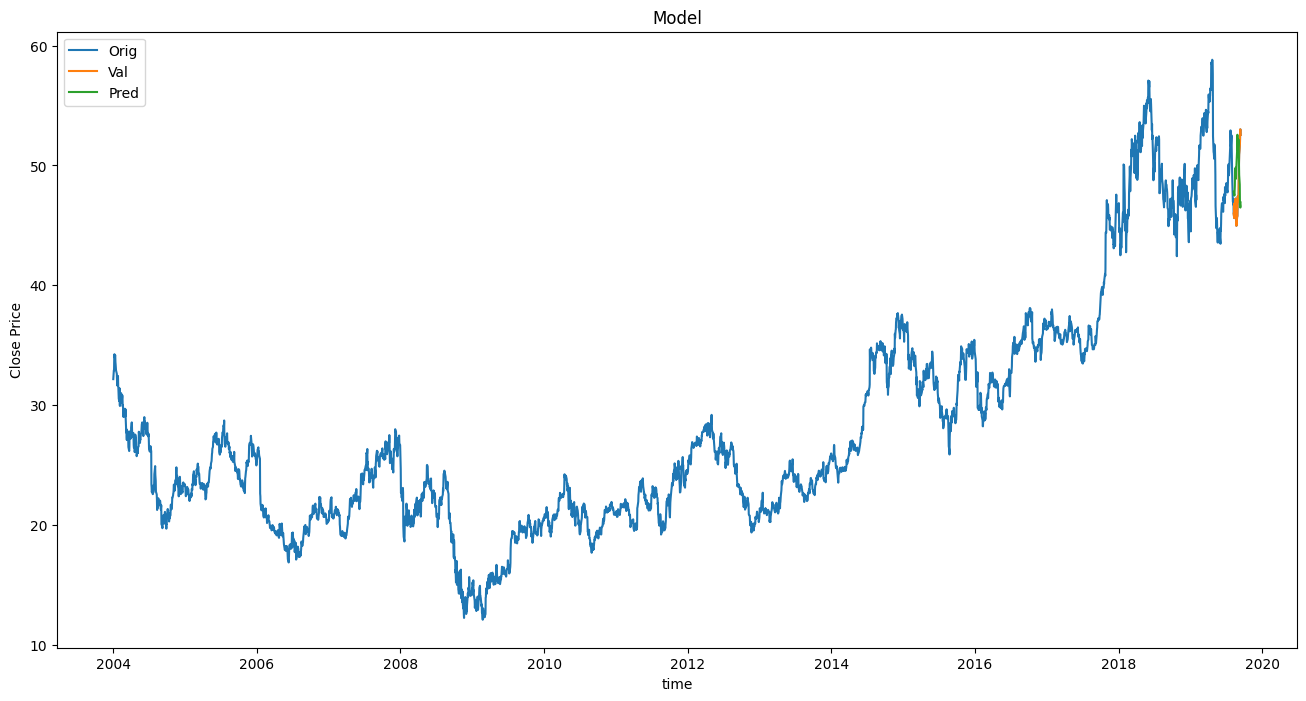

In [28]:
# Visualize
# Decision Tree Regressor
predictions = Ir_prediction
valid = intc[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("time")
plt.ylabel('Close Price')
plt.plot(intc['Close'])
plt.plot(valid[['Close','Prediction']])
# plt.plot(valid[['Prediction','Close']]) # if use tree prediction use these
# plt.legend(['Orig','Pred','Val']) # if use tree prediction use these
plt.legend(['Orig','Val','Pred'])
plt.show()